# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import pickle
import numpy as np
import random
from pandas import DataFrame, read_csv
import pandas as pd

import cv2
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten
print("Tensorflow Version:", tf.__version__)

Tensorflow Version: 0.12.1


In [2]:
# TODO: Fill this in based on where you saved the training and testing data

training_file = "./train.p"
validation_file= "./valid.p"
testing_file = "./test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

#Since the variables are np array, using numpy
#import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Get The class distribution in the Trainning, Validation, and Test data set.

In [17]:
sign_df = read_csv("./signnames.csv")
train_distribution = np.unique(y_train,return_counts=True)
valid_distribution = np.unique(y_valid, return_counts=True)
test_distribution = np.unique(y_test, return_counts=True)
sign_df['Training'] = (pd.Series(train_distribution[1], index=train_distribution[0],name='Train'))
sign_df['Validation'] = (pd.Series(valid_distribution[1], index=train_distribution[0],name='Train'))
sign_df['Test'] = (pd.Series(test_distribution[1], index=train_distribution[0],name='Train'))
sign_classes = sign_df['SignName']
sign_df.head()

,ClassId,SignName,Training,Validation,Test
0,0,Speed limit (20km/h),800,30,60
1,1,Speed limit (30km/h),1980,240,720
2,2,Speed limit (50km/h),2010,240,750
3,3,Speed limit (60km/h),1260,150,450
4,4,Speed limit (70km/h),1770,210,660


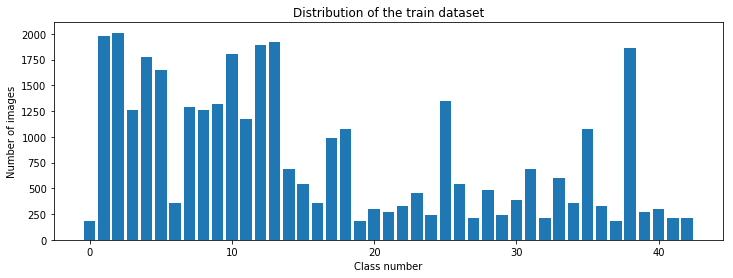

In [5]:
#Plot number of images per class
plt.figure(figsize=(12, 4))
plt.bar(*train_distribution)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [6]:
sign_df.describe()

,ClassId,Training,Validation,Test
count,43.000000,43.000000,43.000000,43.000000
mean,21.000000,809.279070,102.558140,293.720930
std,12.556539,626.750855,69.662213,233.442389
min,0.000000,180.000000,30.000000,60.000000
25%,10.500000,285.000000,60.000000,90.000000
50%,21.000000,540.000000,60.000000,180.000000
75%,31.500000,1275.000000,150.000000,450.000000
max,42.000000,2010.000000,240.000000,750.000000


Display some pictures in the data set.

class:0 shape:(180, 32, 32, 3)
class:1 shape:(1980, 32, 32, 3)
class:2 shape:(2010, 32, 32, 3)
class:3 shape:(1260, 32, 32, 3)
class:4 shape:(1770, 32, 32, 3)
class:5 shape:(1650, 32, 32, 3)
class:6 shape:(360, 32, 32, 3)
class:7 shape:(1290, 32, 32, 3)
class:8 shape:(1260, 32, 32, 3)
class:9 shape:(1320, 32, 32, 3)
class:10 shape:(1800, 32, 32, 3)
class:11 shape:(1170, 32, 32, 3)
class:12 shape:(1890, 32, 32, 3)
class:13 shape:(1920, 32, 32, 3)
class:14 shape:(690, 32, 32, 3)
class:15 shape:(540, 32, 32, 3)
class:16 shape:(360, 32, 32, 3)
class:17 shape:(990, 32, 32, 3)
class:18 shape:(1080, 32, 32, 3)
class:19 shape:(180, 32, 32, 3)
class:20 shape:(300, 32, 32, 3)
class:21 shape:(270, 32, 32, 3)
class:22 shape:(330, 32, 32, 3)
class:23 shape:(450, 32, 32, 3)
class:24 shape:(240, 32, 32, 3)
class:25 shape:(1350, 32, 32, 3)
class:26 shape:(540, 32, 32, 3)
class:27 shape:(210, 32, 32, 3)
class:28 shape:(480, 32, 32, 3)
class:29 shape:(240, 32, 32, 3)
class:30 shape:(390, 32, 32, 3)
clas

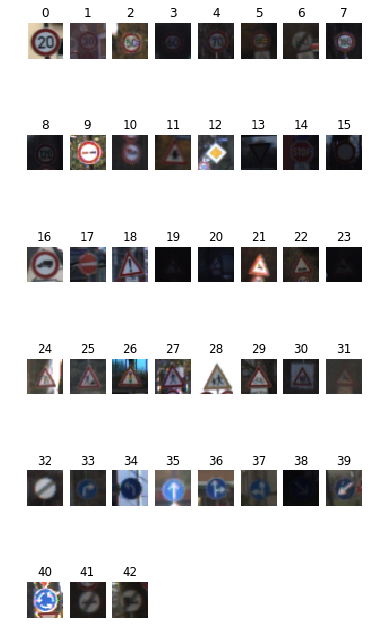

In [7]:
#draw the first image of each class
plt.figure(figsize=(6,12))
for i in range(n_classes):
    plt.subplot(6, 8, i+1)
    class_images = X_train[y_train == i]
    print ("class:{} shape:{}".format(i, class_images.shape))
    plt.imshow(class_images[0, :, :, :]) 
    plt.title(i)
    plt.axis('off')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [11]:
#image processing functions
def eq_Hist(imgs):
    imgs_out = []
    for img in imgs:
        img2=img.copy() 
        img2[:, :, 0] = cv2.equalizeHist(img[:, :, 0])
        img2[:, :, 1] = cv2.equalizeHist(img[:, :, 1])
        img2[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
        imgs_out.append(img2)
    return np.asarray(imgs_out)


# Convert to grayscale
def rgb2gray(imgs):
    return np.sum(imgs/3, axis=3, keepdims=True)

def normalize(imgs):
    return (imgs-128.0)/128.0

def show_images(imgs):
    plt.figure(figsize=(6, 2))
    n = len(imgs)
    i = 1
    for img in imgs:
        plt.subplot(1, n, i)
        i+=1
        if img.shape[-1]==1:
            plt.imshow(img.squeeze(),cmap='gray')
        else:
            plt.imshow(img.squeeze())

Source shape: (34799, 32, 32, 3)
Grayscale shape: (34799, 32, 32, 1)
selected image#: 30537


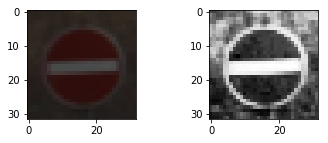

In [9]:
X_train_eqH = eq_Hist(X_train)
X_train_gray = rgb2gray(X_train_eqH)
X_train_normalized = normalize(X_train_gray)

print('Source shape:', X_train.shape)
print('Grayscale shape:', X_train_gray.shape)

#show the images before and after grayscale & normorlization
index = random.randint(0, len(X_train))
print("selected image#:",index)
show_images((X_train[index], X_train_normalized[index]))

X_train = X_train_normalized
X_valid = normalize(rgb2gray(eq_Hist(X_valid)))
X_test = normalize(rgb2gray(eq_Hist(X_test)))
test_img = X_train_normalized[index]

Before and After random translation


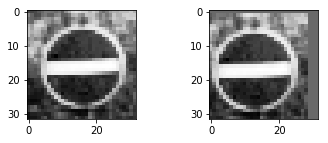

In [10]:
def randtranslate_img(img):
    # translate image up to m pixels in x and y directions
    m = 3
    rows,cols,_ = img.shape
    dx,dy = np.random.randint(-m,m,2)
    M = np.float32([[1,0,dx],[0,1,dy]])
    img2 = cv2.warpAffine(img,M,(cols,rows))
    img2 = img2[:,:,np.newaxis]
    return img2
img2 = randtranslate_img(test_img)

show_images((test_img, img2))
print("Before and After random translation")



Before and After random scaling


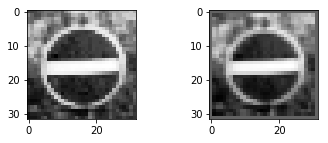

In [11]:

def randscale_img(img):   
    rows,cols,_ = img.shape
    # scale up to m pixels 
    m = np.random.randint(-3,3)
    # from points 
    starts = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])
    # to points
    ends = np.float32([[m,m],[rows-m,m],[m,cols-m],[rows-m,cols-m]])
    M = cv2.getPerspectiveTransform(starts,ends)
    img2 = cv2.warpPerspective(img,M,(rows,cols))
    img2 = img2[:,:,np.newaxis]
    return img2

img2 = randscale_img(test_img)
show_images((test_img, img2))
print("Before and After random scaling")


Before and After random warping


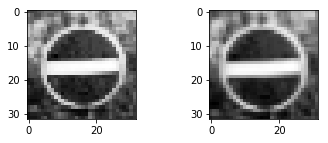

In [12]:
def randwarp_img(img):
    rows,cols,_ = img.shape
    rndx = np.random.rand(5) - 0.5
    #degree of warping
    rndx *= cols * 0.06
    rndy = np.random.rand(5) - 0.5
    rndy *= rows * 0.06

    x1 = cols/4
    x2 = 3*cols/4
    y1 = rows/4
    y2 = 3*rows/4

    starts = np.float32([[y1,x1],
                       [y2,x1],
                       [y1,x2]])
    ends = np.float32([[y1+rndy[0],x1+rndx[0]],
                       [y2+rndy[1],x1+rndx[1]],
                       [y1+rndy[2],x2+rndx[2]]])

    M = cv2.getAffineTransform(starts,ends)
    img2 = cv2.warpAffine(img,M,(cols,rows))
    img2 = img2[:,:,np.newaxis]
    return img2

img2 = randwarp_img(test_img)
show_images((test_img, img2))
print("Before and After random warping")


Before and After random brighten


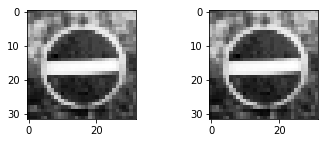

In [13]:
def randbrighten_img(img):
    #brighten an image by linear function
    shifted = img + 1.0
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.3
    coef = np.random.uniform(min_coef, max_coef)
    img2 = shifted * coef - 1.0
    return img2

img2 = randbrighten_img(test_img)
show_images((test_img, img2))
print("Before and After random brighten")

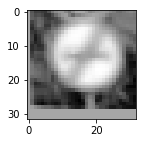

In [14]:
#check one Augmented image
img = X_train[3]
img = randbrighten_img(img)
img = randwarp_img(img)
img = randscale_img(img)
img = randtranslate_img(img)
show_images([img])

In [ ]:
for n in range(n_classes):
    #average samples per class is 800.
    #Make all the classes have 400 samples at least
    n_samples = sign_df['Training'][n]
    threshold = 800
    if  n_samples < threshold:
        class_indices = np.where(y_train == n)
        for i in range(threshold - n_samples):
            img = X_train[class_indices[0][i % n_samples]]
            img = randbrighten_img(img)
            img = randwarp_img(img)
            img = randscale_img(img)
            img = randtranslate_img(img)
            X_train = np.concatenate((X_train, [img]), axis=0)
            y_train = np.concatenate((y_train, [n]), axis=0)
        print('Added {} Augmented images for class:{}'.format((threshold-n_samples), n))
            
print('X, y shapes:', X_train.shape, y_train.shape)

In [ ]:
with open('new_train.p', 'wb') as handle:
    t = {'features':X_train, 'labels':y_train}
    pickle.dump(t, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('new_valid.p', 'wb') as handle:
    t = {'features':X_valid, 'labels':y_valid}
    pickle.dump(t, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('new_test.p', 'wb') as handle:
    t = {'features':X_test, 'labels':y_test}
    pickle.dump(t, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('summary.p', 'wb') as handle:
    t = {'class_names':sign_classes}
    pickle.dump(t, handle, protocol=pickle.HIGHEST_PROTOCOL)

CHECK POINT

In [2]:
training_file = "./new_train.p"
validation_file= "./new_valid.p"
testing_file = "./new_test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

n_train = X_train.shape[0]
n_validation = X_valid.shape[0]
n_test = X_test.shape[0]
image_shape = X_train.shape[1:]
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 46480
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 1)
Number of classes = 43


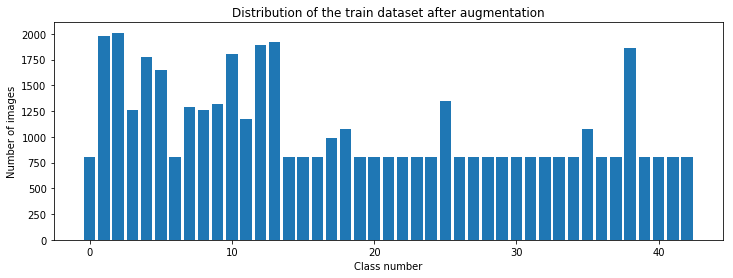

In [10]:
train_distribution = np.unique(y_train,return_counts=True)
#Plot number of images per class
plt.figure(figsize=(12, 4))
plt.bar(*train_distribution)
plt.title("Distribution of the train dataset after augmentation")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

### Model Architecture

In [3]:
#The base class for the model
from tensorflow.contrib.layers import flatten
class SignClassifier:
    def __init__(self,name):
        self.name = name
        #input data
        self.x = tf.placeholder(tf.float32, (None, 32, 32, 1),name='x')
        #input label
        self.y = tf.placeholder(tf.int32, (None), name='y')
        self.one_hot_y = tf.one_hot(self.y, n_classes)
        
        self.is_training = tf.placeholder(tf.bool, name='is_training') 
        self.keep_prob = tf.placeholder(tf.float32, name='keep_prob')
        self.lr = 0.0001
        self.epochs = 20
        self.batch_size = 128
        self.mu = 0
        self.sigma = 0.1
        self.layer_cnt = 0
        self.save_file =  './'+self.name+'.ckpt'
        self.training_accuracy_epochs =[]
        self.validation_accuracy_epochs =[]
        
    def model(self):
        #abstract method. Implemented in derived classes for different model architectore
        #return logits of input data
        pass
    def build(self):   
        #build the model and trainning pipeline
        
        self.logits = self.model()
        self.cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=self.one_hot_y, logits=self.logits)
        self.loss = tf.reduce_mean(self.cross_entropy)
        self.optimizer = tf.train.AdamOptimizer(self.lr)
        self.training_operation = self.optimizer.minimize(self.loss)
        self.correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.one_hot_y, 1))
        self.accuracy_operation = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))

    def evaluate(self, x, y):
        num_examples = len(x)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, self.batch_size):
            batch_x, batch_y = x[offset:offset+self.batch_size], y[offset:offset+self.batch_size]
            accuracy = sess.run(self.accuracy_operation, 
                                feed_dict={self.x: batch_x, self.y: batch_y, self.is_training:False, self.keep_prob:1.0}
                               )
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples
    def set_training_param(self, epochs=20, batch_size=128, lr=0.001):
        self.epochs = epochs
        self.batch_size = batch_size
        #learning rate
        self.lr = lr
    def load(self, sess=None, load_model=False):
        if load_model:
            #self.saver = tf.train.import_meta_graph('./'+self.name+'.meta')
            self.saver = tf.train.import_meta_graph(self.save_file+'.meta')
        if sess is None:
            sess = tf.get_default_session()
        #self.saver.restore(sess, tf.train.latest_checkpoint(self.save_path))
        #self.saver.restore(sess, tf.train.latest_checkpoint('.'))
        #self.saver.restore(sess, './'+self.name+'.ckpt')
        self.saver.restore(sess, self.save_file)
        print ("Model Loaded:", self.save_file)
    def train(self,x_train, y_train, x_valid, y_valid, x_test=None, y_test=None, load_saved=False, keep_prob=0.5):
        with tf.Session() as sess:
            if load_saved:
                self.load(sess)
            else:
                sess.run(tf.global_variables_initializer())
                self.saver = tf.train.Saver()
            num_examples = len(x_train)
    
            for i in range(self.epochs):
                x_train, y_train = shuffle(x_train, y_train)
                training_accuracy = 0.0
                for offset in range(0, num_examples, self.batch_size):
                    end = offset + self.batch_size
                    batch_x, batch_y = x_train[offset:end], y_train[offset:end]
                    feed_dict = {self.x: batch_x, self.y: batch_y,self.is_training: True, self.keep_prob:keep_prob}
                    _, training_accuracy = sess.run((self.training_operation, self.accuracy_operation), 
                                                     feed_dict=feed_dict)
            
                print("EPOCH {} ...".format(i+1))
                print("Trainning Accuracy = {:.3f}".format(training_accuracy))
                validation_accuracy = self.evaluate(x_valid, y_valid)
                print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                self.training_accuracy_epochs.append(training_accuracy)
                self.validation_accuracy_epochs.append(validation_accuracy)
            self.save_path = self.saver.save(sess, self.save_file) 
            print("Model saved:",self.save_file)
            
            if x_test is not None and y_test is not None:
                test_accuracy = self.evaluate(x_valid, y_valid)
                print("Test Accuracy = {:.3f}".format(test_accuracy))
                
    def test(self, x, y):
        with tf.Session() as sess:
            #self.saver.restore(sess, tf.train.latest_checkpoint('.'))
            self.saver.restore(sess, self.save_file)
            test_accuracy = self.evaluate(x, y)
            print("Test Accuracy = {:.3f}".format(test_accuracy))
            
    def conv2d(self, x, shape, padding='SAME'):
        weights = tf.Variable(tf.truncated_normal(shape=shape, mean = self.mu, stddev = self.sigma),
                                                  name='conv2d_w_'+str(self.layer_cnt))
        bias = tf.Variable(tf.zeros(shape[-1]), name = 'conv2d_b_'+str(self.layer_cnt))
        y = tf.nn.conv2d(x, weights, strides=[1, 1, 1, 1], padding=padding)
        y = tf.nn.bias_add(y, bias)
        self.layer_cnt += 1                      
        return y
    
    def conv2d_relu(self, x, shape, padding='SAME'):
        return tf.nn.relu(self.conv2d(x,shape,padding),name='conv2d_act_'+str(self.layer_cnt-1))
        #return tf.nn.relu(self.conv2d(x,shape,padding))
    
    def maxpool2d(self, x, k=2, s=None, padding='SAME'):
        if s is None:
            s = k
        return tf.nn.max_pool(x, ksize = [1, k, k, 1], strides = [1, s, s, 1], padding=padding)
    
    def fc(self, x, shape):
        weights = tf.Variable(tf.truncated_normal(shape=shape, mean = self.mu, stddev = self.sigma),
                             name = 'fc_w_'+str(self.layer_cnt))
        bias = tf.Variable(tf.zeros(shape[-1]), name='fc_b_'+str(self.layer_cnt))
        l   = tf.nn.bias_add(tf.matmul(x, weights), bias)
        self.layer_cnt += 1
        return l
        
    def fc_relu(self, x, shape):
        return tf.nn.relu(self.fc(x, shape),name='fc_act_'+str(self.layer_cnt -1))
        #return tf.nn.relu(self.fc(x, shape))
        
    def batch_norm(self, x, is_training, decay=0.9, eps=1e-5):
        """Batch Normalization
           Args:
               x: input data
               is_training: when you test, please set is_training "None"
           Returns:
               output for next layer
        """
        shape = x.get_shape()[1:] 
        
        gamma = tf.Variable(tf.ones(shape), name="gamma")
        beta = tf.Variable(tf.zeros(shape), name="beta")
        pop_mean = tf.Variable(tf.zeros(shape), trainable=False, name="pop_mean")
        pop_var = tf.Variable(tf.ones(shape), trainable=False, name="pop_var")

        if is_training != None:
            batch_mean, batch_var = tf.nn.moments(x, [0])
            train_mean = tf.assign(pop_mean, pop_mean * decay + batch_mean*(1 - decay))
            train_var = tf.assign(pop_var, pop_var * decay + batch_var * (1 - decay))
            with tf.control_dependencies([train_mean, train_var]):
                return tf.nn.batch_normalization(x, batch_mean, batch_var, beta, gamma, eps)
        else:
            return tf.nn.batch_normalization(x, pop_mean, pop_var, beta, gamma, eps)

In [7]:
class IntNet(SignClassifier):
    def __init__(self, name):
        super().__init__(name)
    def model(self):
        
        def inception_module(x, in_d, d_out):
            d_1x1 = 32
            conv1x1 = self.conv2d(x, (1, 1, in_d, d_out))
            conv2 = self.conv2d_relu(x, (1, 1, in_d, d_1x1))
            conv3 = self.conv2d_relu(x, (1, 1, in_d, d_1x1))
            maxpool = self.maxpool2d(x, 3, 1)
            conv_maxpool = self.conv2d(maxpool, (1, 1, in_d, d_out))
            conv3x3 = self.conv2d_relu(conv2, (3, 3, d_1x1, d_out//2))
            conv3x3 = self.conv2d(conv3x3, (1, 1, d_out//2, d_out))
            conv5x5 = self.conv2d_relu(conv3, (5, 5, d_1x1, d_out//2))
            conv5x5 = self.conv2d(conv5x5, (1, 1, d_out//2, d_out))
            if tf.__version__ == '1.0.1':
                return tf.nn.relu(tf.concat([conv1x1, conv3x3, conv5x5, conv_maxpool],3))
            else:
                return tf.nn.relu(tf.concat(3,[conv1x1, conv3x3, conv5x5, conv_maxpool]))
            
        def Net(x):    
            depth_1 = 64
            depth_2 = 128
            depth_3 = 256 
            depth_4 = 512 
            conv1 = self.conv2d_relu(x, (1, 1, 1, 1)) 
            self.conv2 = self.conv2d_relu(conv1, (5, 5, 1, depth_1)) 
            #conv2 = tf.nn.dropout(self.conv2, self.keep_prob)     
            self.incept1 = inception_module(self.conv2, depth_1, depth_1) 
            maxpool1 = self.maxpool2d(self.incept1, 2, 2,'VALID') 
            #conv2 = tf.nn.dropout(self.conv2, self.keep_prob)     
            self.incept2 = inception_module(maxpool1, int(maxpool1.get_shape()[3]), depth_2) 
            maxpool2 = self.maxpool2d(self.incept2, 3, 2, 'VALID') 
            self.conv3 = self.conv2d_relu(maxpool2, (1, 1, int(maxpool2.get_shape()[3]), depth_3)) 
            conv3 = tf.nn.dropout(self.conv3, self.keep_prob)     
            fc = flatten(conv3)
            d_in = int(fc.get_shape()[1])
            self.fc1 = self.fc_relu(fc, (d_in, depth_4))
            fc = tf.nn.dropout(self.fc1, self.keep_prob)     
            self.logits = self.fc(fc, (depth_4,n_classes))                    
            return self.logits
        return Net(self.x)

In [8]:
#Trainning settings
model = IntNet("IntNet")
model.build()
model.set_training_param(epochs=10,lr=0.0008)
#model.train(X_train, y_train, X_valid, y_valid,X_test, y_test)
model.train(X_train, y_train, X_valid, y_valid)

EPOCH 1 ...
Trainning Accuracy = 0.375
Validation Accuracy = 0.410
EPOCH 2 ...
Trainning Accuracy = 0.438
Validation Accuracy = 0.656
EPOCH 3 ...
Trainning Accuracy = 0.500
Validation Accuracy = 0.799
EPOCH 4 ...
Trainning Accuracy = 0.938
Validation Accuracy = 0.890
EPOCH 5 ...
Trainning Accuracy = 0.875
Validation Accuracy = 0.926
EPOCH 6 ...
Trainning Accuracy = 0.875
Validation Accuracy = 0.943
EPOCH 7 ...
Trainning Accuracy = 0.875
Validation Accuracy = 0.956
EPOCH 8 ...
Trainning Accuracy = 1.000
Validation Accuracy = 0.955
EPOCH 9 ...
Trainning Accuracy = 0.938
Validation Accuracy = 0.965
EPOCH 10 ...
Trainning Accuracy = 0.938
Validation Accuracy = 0.974
Model saved: ./IntNet.ckpt


In [24]:
model.set_training_param(epochs=5)
#model.train(X_train, y_train, X_valid, y_valid,X_test, y_test, True)
model.train(X_train, y_train, X_valid, y_valid, load_saved=True)

Model Loaded: ./IntNet.ckpt
EPOCH 1 ...
Trainning Accuracy = 1.000
Validation Accuracy = 0.977
EPOCH 2 ...
Trainning Accuracy = 0.938
Validation Accuracy = 0.979
EPOCH 3 ...
Trainning Accuracy = 0.938
Validation Accuracy = 0.980
EPOCH 4 ...
Trainning Accuracy = 0.938
Validation Accuracy = 0.982
EPOCH 5 ...
Trainning Accuracy = 1.000
Validation Accuracy = 0.985
Model saved: ./IntNet.ckpt


In [ ]:
model.set_training_param(epochs=5)
#model.train(X_train, y_train, X_valid, y_valid,X_test, y_test, True)
model.train(X_train, y_train, X_valid, y_valid, load_saved=True)

In [9]:
model.test(X_test, y_test)

Test Accuracy = 0.952


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [21]:
class MSNet(SignClassifier):
    def __init__(self, name):
        super().__init__(name)
        #self.is_training = tf.placeholder(tf.bool, name='is_training') 
    def model(self):
        #32x32->16x16
        conv1 = self.conv2d_relu(self.x, (5,5,1,16),'SAME')
        conv1 = self.maxpool2d(conv1,padding='SAME')
        #16x16->8x8
        conv2 = self.conv2d_relu(conv1,  (5,5,16,64),'SAME')
        conv2 = self.maxpool2d(conv2, padding='SAME')
        
        conv3 = self.conv2d_relu(conv2,  (3,3,64,256),'SAME')
        conv3 = self.maxpool2d(conv2, padding='SAME')
       
        if tf.__version__ != '1.0.1':
            fc_in = tf.concat(1,[flatten(conv2), flatten(conv3)])
        else:    
            fc_in = tf.concat([flatten(conv2), flatten(conv3)], 1)
            
        size = fc_in.shape[1]
        size = 5120
        #size = 16*16*6 + 8*8*16
        fully = self.fc_relu(fc_in, (size, 300))
        fully = tf.nn.dropout(fully, self.keep_prob)
        logits = self.fc(fully, (300,n_classes))
        
        return logits

In [22]:
#Trainning settings
EPOCHS = 10
BATCH_SIZE = 128
rate = 0.001
model_ms = MSNet("MSNet")
model_ms.build()
model_ms.set_training_param(epochs=1,lr=0.0008)
model_ms.train(X_train, y_train, X_valid, y_valid,X_test, y_test)

EPOCH 1 ...
Trainning Accuracy = 0.375
Validation Accuracy = 0.480
Model saved: ./MSNet.ckpt
Test Accuracy = 0.480


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(11, 32, 32, 1)


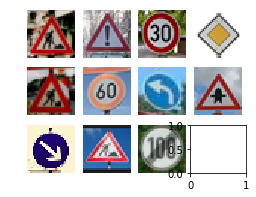

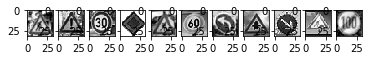

In [21]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
import matplotlib.image as mpimg

fig, axs = plt.subplots(3,4, figsize=(4, 3))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

new_images_orig = []

for i, img in enumerate(glob.glob('./mySigns/*.png')):
    image = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
    axs[i].axis('off')
    axs[i].imshow(image)
    new_images_orig.append(image)

new_images = np.asarray(new_images_orig)
new_images = normalize(rgb2gray(eq_Hist(new_images)))

print(new_images.shape)
show_images(new_images)

new_labels = [25, 18, 1, 12, 
              25, 3, 34, 11,
              38, 25, 7]


### Predict the Sign Type for Each Image

In [22]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [26]:
model.test(new_images, new_labels)

Test Accuracy = 0.727


### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.




### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [27]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.


print(model.name)
def get_top_k(x, model, k):
    #softmax_logits = tf.nn.softmax(tf.nn.softmax(model.logits))
    softmax_logits = tf.nn.softmax(model.logits)
    top_k_op = tf.nn.top_k(softmax_logits, k=k)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        saver = tf.train.import_meta_graph('./'+model.name+'.ckpt.meta')
        saver.restore(sess, './'+model.name+'.ckpt')
        #softmax_logits = sess.run(softmax_logits, feed_dict={model.x: new_images, model.keep_prob: 1.0})
        top_k = sess.run(top_k_op, feed_dict={model.x: x, model.keep_prob: 1.0})
        #print (top_5)
    return top_k
signs_top_5 = get_top_k(new_images, model, 5)

IntNet


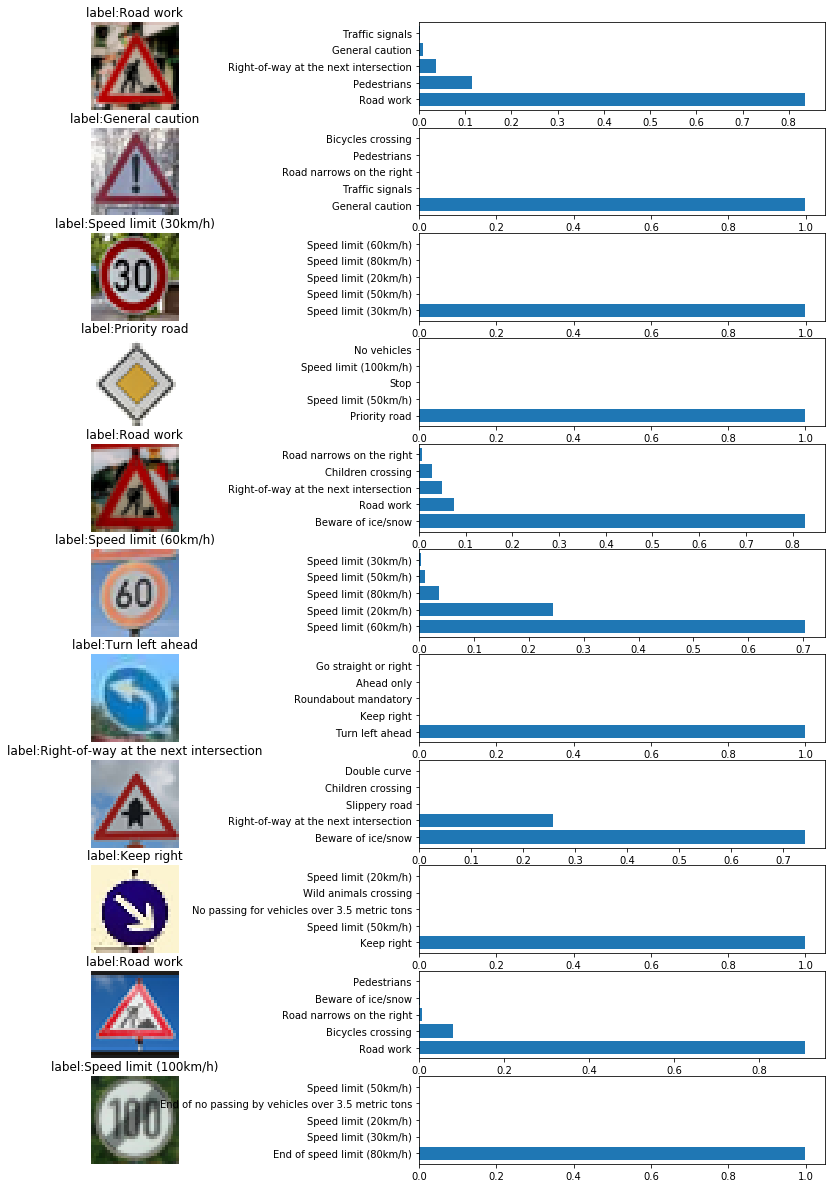

In [28]:
n_images = len(new_images_orig)
plt.figure(figsize=(16, 21))
for i in range(n_images):
    plt.subplot(n_images, 2, 2*i+1)
    plt.imshow(new_images_orig[i]) 
    plt.title("label:"+sign_classes[new_labels[i]])
    plt.axis('off')
    plt.subplot(n_images, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), signs_top_5.values[i, :])
    labs=[sign_classes[j] for j in signs_top_5.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()

In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    #activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    activation = tf_activation.eval(session=sess,feed_dict={model.x : image_input})
    featuremaps = activation.shape[3]
    print (activation.shape, activation_min, activation_max)
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./'+model.name+'.ckpt.meta')
    saver.restore(sess, './'+model.name+'.ckpt')
    outputFeatureMap(new_images[[0]], model.incept1)